# Sampling according to a distribution


### References

- [Inverse Transform Sampling in Python](https://mitch-ml.github.io/posts/2018/06/24/sampling.html)
> NOTA: Finally it was not used the proposed library in this post because is very slow.
- [GitHub Gist: amarvutha/inverse_transform_probability_distribution.py](https://gist.github.com/amarvutha/c2a3ea9d42d238551c694480019a6ce1)
- [A Gentle Introduction to Monte Carlo Sampling for Probability](https://machinelearningmastery.com/monte-carlo-sampling-for-probability/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Distribution examples

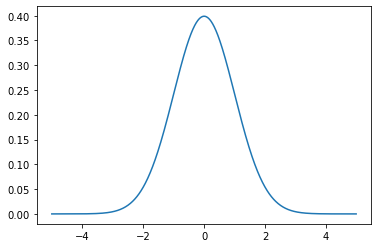

In [2]:
# Gaussian 1D
from scipy.stats import norm
pdf = norm(loc = 0., scale = 1.0).pdf

#plot the pdf
x = np.arange(-5, 5, .01)
plt.plot(x, pdf(x))
plt.show()

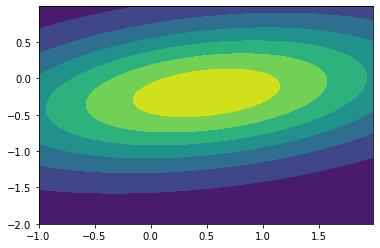

In [304]:
## Gaussian 2D
from scipy.stats import multivariate_normal
#create a multivariate Gaussian object with specified mean and covariance matrix
mu, cov = [0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]]
pdf2d = lambda x: multivariate_normal(mu,cov).pdf(x) 

#plot the pdf
x, y = np.mgrid[-1:2:.01, -2:1:.01]
pos = np.dstack((x, y))
plt.contourf(x, y, pdf2(pos))
plt.show()

In [ ]:
from matplotlib import colors
plt.hist2d(sample[:,0], sample[:,1],
           bins = 100, 
           norm = colors.LogNorm(), 
           cmap ="RdYlGn_r")

## 1. Univariate - Inverse Transform Sampling

Get sample from a univariate random variable according its distribution.

In [319]:
import numpy as np
from numpy.random import random
from scipy import interpolate

def estimate_inverse_cdf(g:'function', xi:float, xf:float,nxlinspace:int = 1000000)->'function':
    x = np.linspace(xi, xf, 1000000)
    y = g(x)                        # probability density function, pdf
    cdf_y = np.cumsum(y)            # cumulative distribution function, cdf
    cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0
    inverse_cdf = interpolate.interp1d(cdf_y, x)    # this is a function
    return inverse_cdf

def get_sample_1d(pdf:'function', nsample:int, xi:float, xf:float)->np.array:
    # let's generate some samples according to the chosen pdf, f(x)
    uniform_samples = random(int(nsample))
    required_samples = estimate_inverse_cdf(pdf, xi, xf)(uniform_samples)
    return required_samples

# get sample
nsample = 100000
xi, xf = -5, 5
vsample = get_sample(pdf, nsample, xi, xf)

<class 'scipy.interpolate.interpolate.interp1d'>


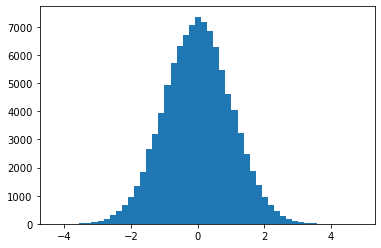

In [181]:
# plot sample distribution
fig, ax = plt.subplots()
ax.hist(vsample, bins = 50)
plt.show()

## 2. Multivariate - Monte Carlo Sampling

Get sample from a multivariate random variable according its distribution.

In [312]:
def get_sample_2d(pdf2d:'function', nsample:int, xi:float, xf:float, yi:float, yf:float, xy_res:int = 1000):
    # build grid of inputs
    vx = np.linspace(xi, xf, xy_res)
    vy = np.linspace(yi, yf, xy_res)
    x, y = np.meshgrid(vx, vy)
    pos = np.dstack((x, y))
    # get probabilities domain
    domain = pdf2d(pos)
    # reshape: matrix of pairs (x,y) to 1d array of pairs
    ndim = domain.shape[0]*domain.shape[1]
    pos_re = pos.reshape(ndim,-1)
    # normalize domain and reshape to 1d
    domain_norm = domain.ravel()/np.sum(domain)
    # index of positions
    pos_index = np.arange(ndim)
    # radom selection of positions (indexes) according domain (probabilites)
    i_sample = np.random.choice(pos_index, size = nsample, p = domain_norm)
    # sample of positions
    sample = pos_re[i_sample]
    # return 
    return sample

In [317]:
# get sample
nsample = 100000
xi, xf = -5, 6
yi, yf = -4, 3
xy_res = 1000
sample = get_sample_2d(pdf2d, nsample, xi, xf, yi, yf)

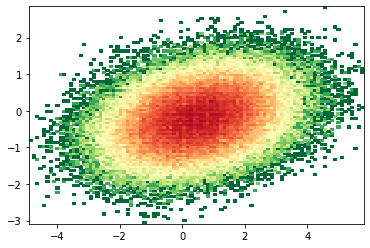

In [318]:
from matplotlib import colors
plt.hist2d(sample[:,0], sample[:,1],
           bins = 100, 
           norm = colors.LogNorm(), 
           cmap ="RdYlGn_r")
plt.show()